<a href="https://colab.research.google.com/github/SarthakV7/Financial-analysis/blob/main/Key_financial_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Let's go over a few key financial topics. We'll be discussing 
* Types of funds
* Order boks
* Latency Arbitrage (HFT)
* Short selling

### Types of funds: 
There are 3 major type of funds and they vary by fees, transparency, regulation, and more. Let's look at them:

1. **ETF - Exchange Traded Funds:** These are made up of a basket of funds, bonds, commodities etc. Their holdings are completely public and transparent and individuals can buy and trade the marketable security. People who buy ETFs are more interested in a diversified portfolio and want to keep their investment in an ETF for a longer period of time. One of the most common ETF is the Spider (SPY) which tracks the S&P500 index.
  * Expense ratio: 0.01% - 1%
  * Liquidity: Buy/Sell like a stock. (Most liquid).

2. **Mutual funds:** It is an investment vehicle made up of a pool of funds collected from many investors for the purpose of investing and securities such as stocks, bonds, money market instruments and similar assets. They are operated by money managers, who invest the fund's capital and attempt to produce capital gains and income for the fund's investors. They disclose their holdings typically once a quarter (can vary by fund).
  * Expense ratio: 0.5% - 3%
  * Liquidity: Buy/Sell at end ofvday through broker. (Not so liquid).

3. **Hedge funds:** These are alternative investement using pooled funds that employ numerous different strategies to earn active return, or alpha, for their investors. They may make use of derivatives and leverage in both domestic and international markets with the goal of generating high returns (either in absolute sense or by following an index). So the main goal here is to beat the market or benchmarks. These are only assessable to accredited/authorized investors as they require less SEC regulations than other funds.
  * 2% of fund and 20% of profit (aka 2:20 ratio).
  * Liquidity: Depends on agreement. (Least liquid).

### Order books:

Making an order includes the following:

* Buy or Sell
* Symbol
* Number of shares
* LIMIT or MARKET: Choose "LIMIT" if there's limit price that you are willing to pay up to for the shares. Else "MARKET" if you want to trade at best available market price.
* Price: The lowest price that you are willing to sell the stocks for.

Example order:

* BUY, AAPL, 200, MARKET
* SELL, TSLA, 400, MARKET
* BUY, AMD, 2000, LIMIT, 13.95
* SELL, NVDA, 150, LIMIT, 160.99

Once we place an order, it goes to an exchange which sends it to the order book (Every exchange has it's own order book). <br><br>
<img src='https://data.nasdaq.com/images/products/Q11-1723-Level-2_GOOG_SHORT_1024.jpg'><br>

Dark pool is where a trade between brokers takes place without even reaching the stock exchange.
<br><br>
<img src='https://i.ibb.co/ynMGqDR/dark-pool.png' width=500px><br>



### Latency Arbitrage:

High Frequency Trading (HFT) firms take advantage of the latency differences due to geographical distances. They are able to place order in less time order of micro-seconds which gives them an advantage of detecting a huge orders at the nearest exchange and placing a similar order on another exchange before they sync and the price goes up.

<img src='https://i.ibb.co/xSbHFL9/hft.png' width=500px>

### Short selling:

This allows us to profit if a stock drops in price, however it comes with a great risk, due to the fact that there can be no ceiling to the amount of money you could possibly lose.

### Capital Asset Pricing Model (CAPM):

It is a model that helps describe risk and separating market returns vs your portfolio returns.

* Portfolio returns can be defined as: <br>
$r_p(t) = \sum w_i.r_i(t)$ <br>
$w_i = \frac{MarketCap_i}{\sum MarketCap}$ <br>

* CAPM equation is stated as the following:<br>
$r_i(t) = \beta_i.r_m(t) + \alpha_i(t)$ <br>
The beta factor implies that a stock's return is proportional to the market's return with $\beta$ as constant coeff. and some residual $\alpha$ term. So if:
  * $\beta$ = 1: The stock moves similar to market.
  * $\beta$ = 2: The stock moves twice as much as market.

  The residual term $\alpha$ is an error that cannot be predicted as per the CAPM model. But we could break up the $\alpha$ in terms of individual stocks and represent the above equation as:<br>
  $r_i(t) = \beta_i.r_m(t) + \sum w_i.\alpha_i(t)$ <br><br>

Let's see how to harvest this $\alpha$ and design a CAPM model that beats the market.



In [ ]:
!pip install quandl
!pip install --upgrade plotly

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
sns.set()

In [ ]:
start_date = pd.to_datetime('2010-01-04')
end_date = pd.to_datetime('2017-07-25')

In [44]:
spy_etf = pd.read_csv('SPY.csv', index_col='Date')
spy_etf.index = pd.to_datetime(spy_etf.index)
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,94.130867,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,94.380074,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,94.446495,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,94.845207,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,95.160805,126402800


In [45]:
aapl = quandl.get('WIKI/AAPL', start_date=start_date, end_date=end_date)
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0


Adjusted close price


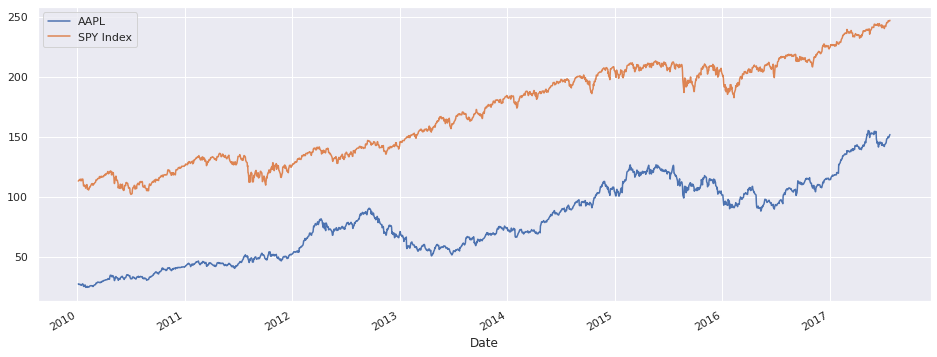

In [46]:
aapl['Adj. Close'].plot(label='AAPL', figsize=(16,6))
spy_etf['Close'].plot(label='SPY Index')
print('Adjusted close price')
plt.legend()
plt.show()

In [47]:
aapl['cumulative'] = aapl['Adj. Close']/aapl['Adj. Close'].iloc[0]
spy_etf['cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

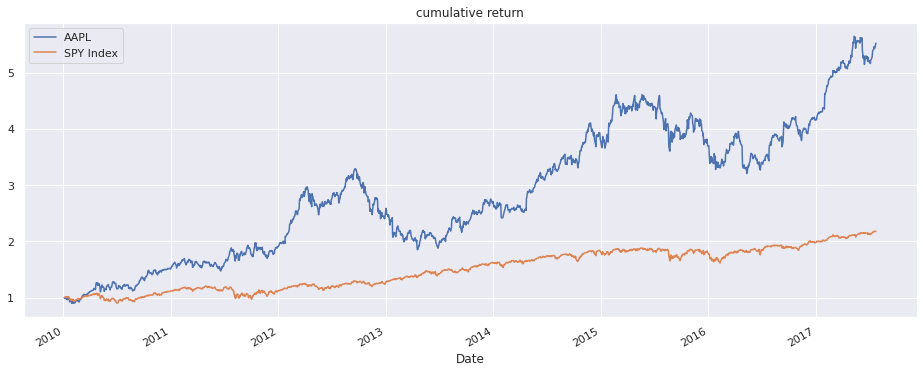

In [48]:
aapl['cumulative'].plot(label='AAPL', figsize=(16,6))
spy_etf['cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('cumulative return')
plt.show()

In [49]:
aapl['Daily return'] = aapl['Adj. Close'].pct_change(1)
spy_etf['Daily return'] = spy_etf['Close'].pct_change(1)

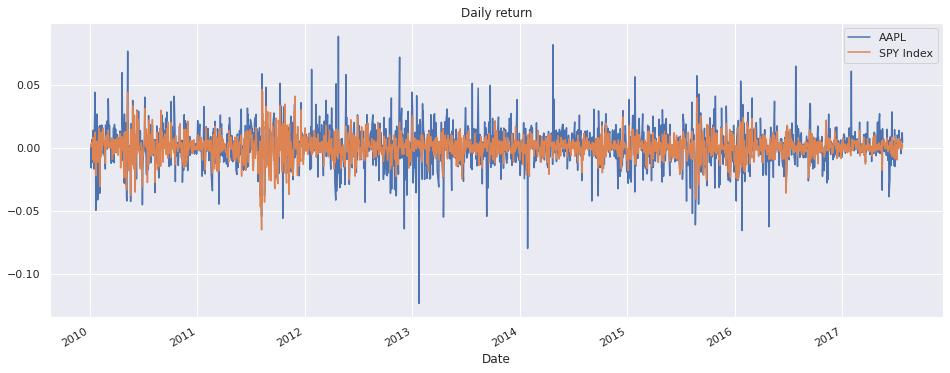

In [50]:
aapl['Daily return'].plot(label='AAPL', figsize=(16,6))
spy_etf['Daily return'].plot(label='SPY Index')
plt.legend()
plt.title('Daily return')
plt.show()

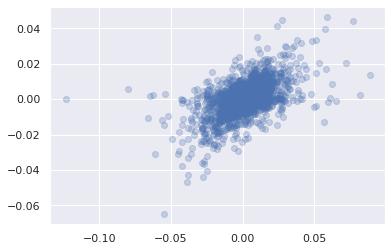

In [51]:
plt.scatter(aapl['Daily return'], spy_etf['Daily return'], alpha=0.25)
plt.show()

In [52]:
from scipy import stats

In [53]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily return'].iloc[1:],
                                                          spy_etf['Daily return'].iloc[1:])

In [54]:
beta, alpha, r_value, p_value, std_err

(0.3261914834998365,
 0.00011951696849063536,
 0.5560199650012244,
 8.444672494045787e-155,
 0.011186513070962887)

We can see that the beta is very low, meaning, the apple stock returns are not very closely related to the SPDR ETF.

### Stock splits, Dividends & Survivalship Bias:

**Stock splits:** Companies split their stocks to make them more liquid. This changes the close price therefore we use the adjusted prices insted of the raw stock prices.

 **Dividends:** Often companies also pay dividends for each unit of stock, each shareholder receives some payout. This causes the price to jump before the dividend anouncement, and then drop after the dividend is paid out. This is also taken care by the Adjusted price.

 **Survivalship Bias:** Companies frequently join and leave indices, if we follow an index backward, we may see that the companies listed in say S&P500 today are only $\frac{1}{3}$ of that joined back in 1980. The remaining left and new ones took there place. We must keep this phenomenon in mind when choosing a stock in any index.

### Efficient Market Hypothesis (EMH):

EMH theory states that it is impossible to "beat the market" because stock market efficiency causes the existing share prices to always incorporate and reflect all relevant information.

But this is not completely true, market could be outperformed as there are many stocks that are overvalued and we have strategies to counter those type of market movements. Hedge funds use these type of strategies a lot to beat the market and make profit.